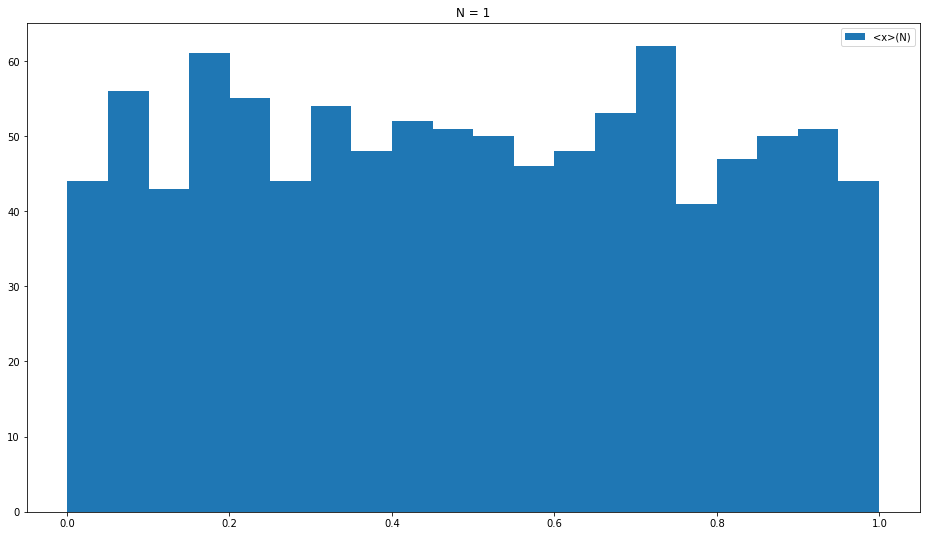

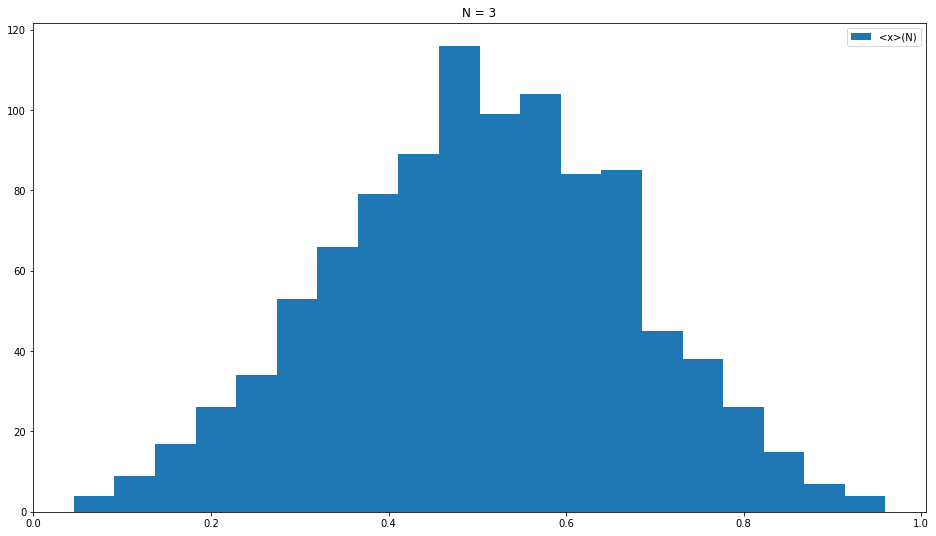

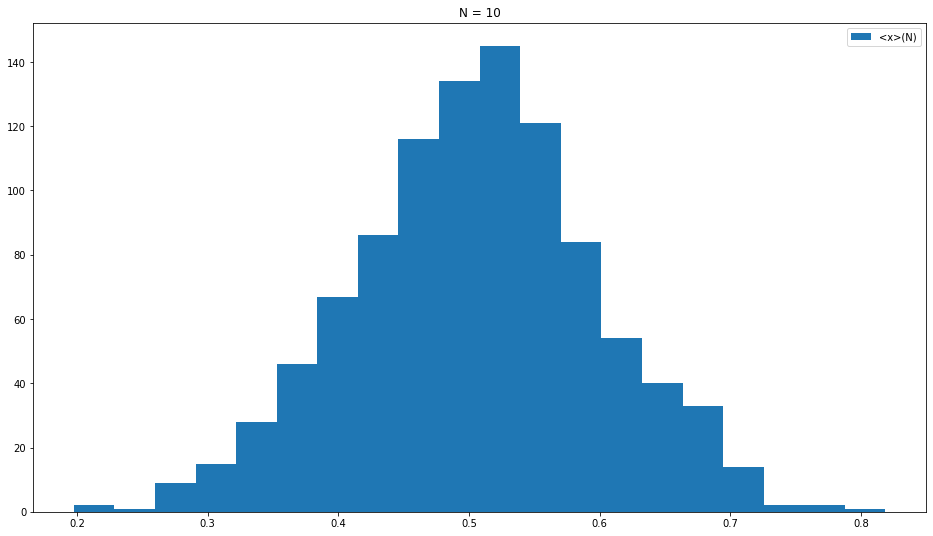

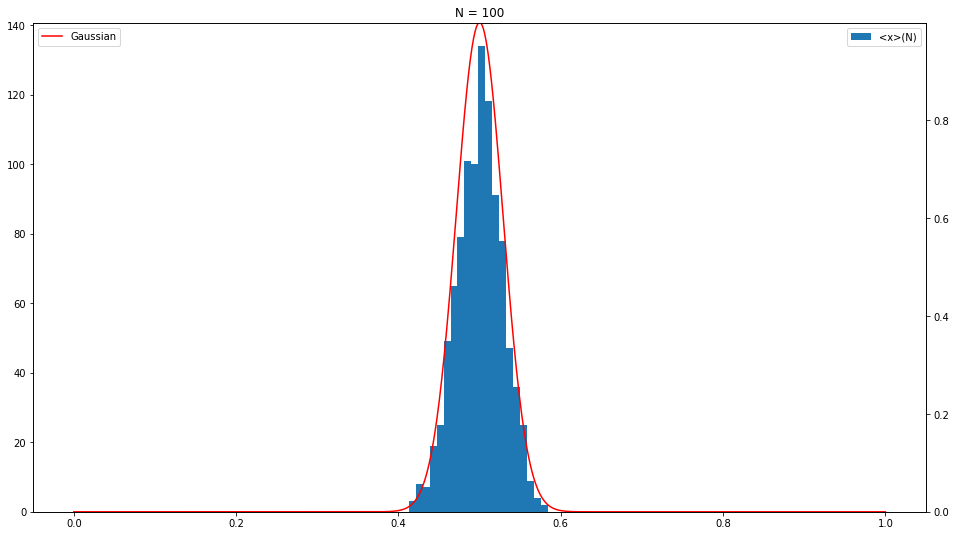

Mean of the exponential distribution is: 



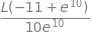

Standard Deviation of the exponential distribution is: 



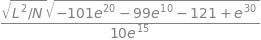

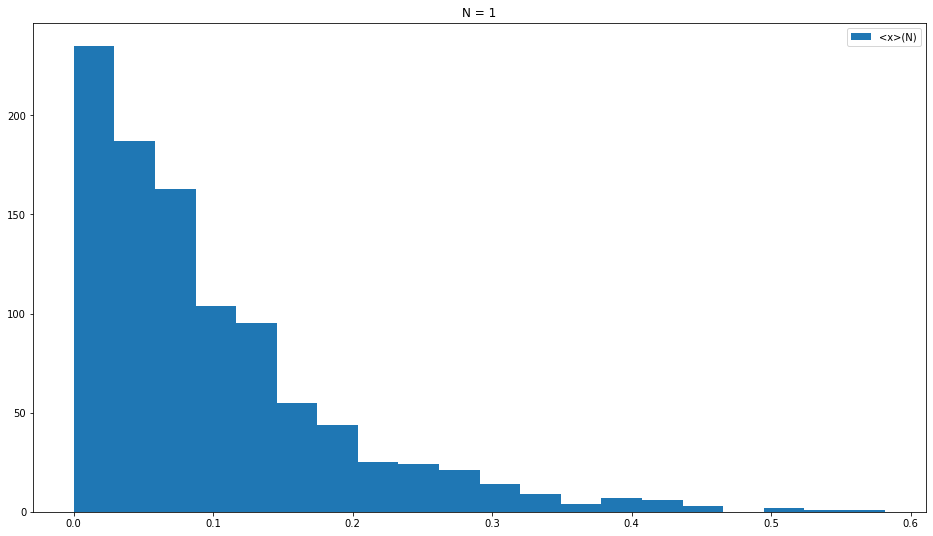

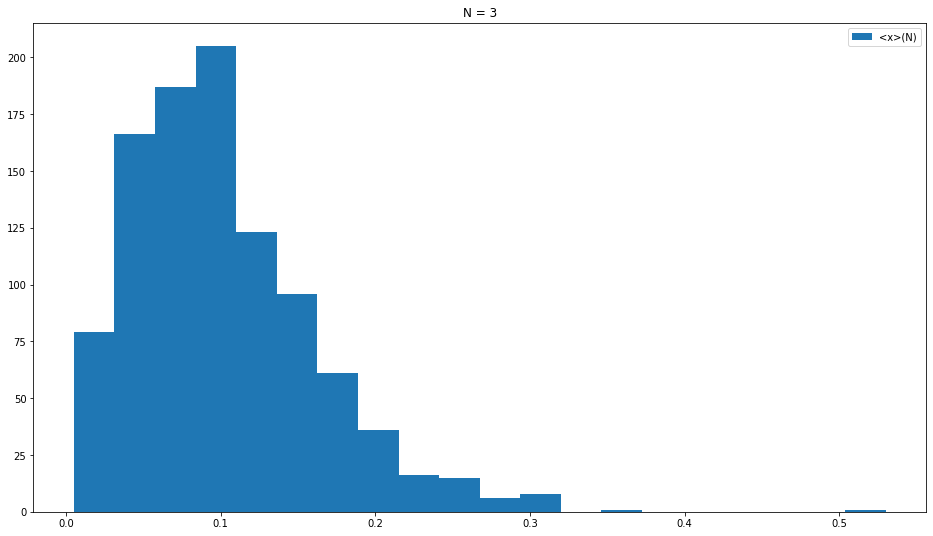

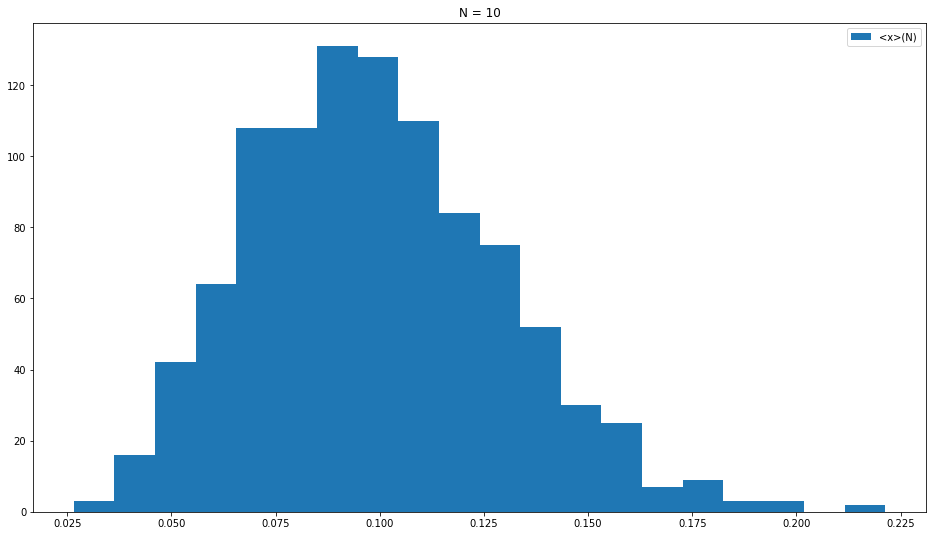

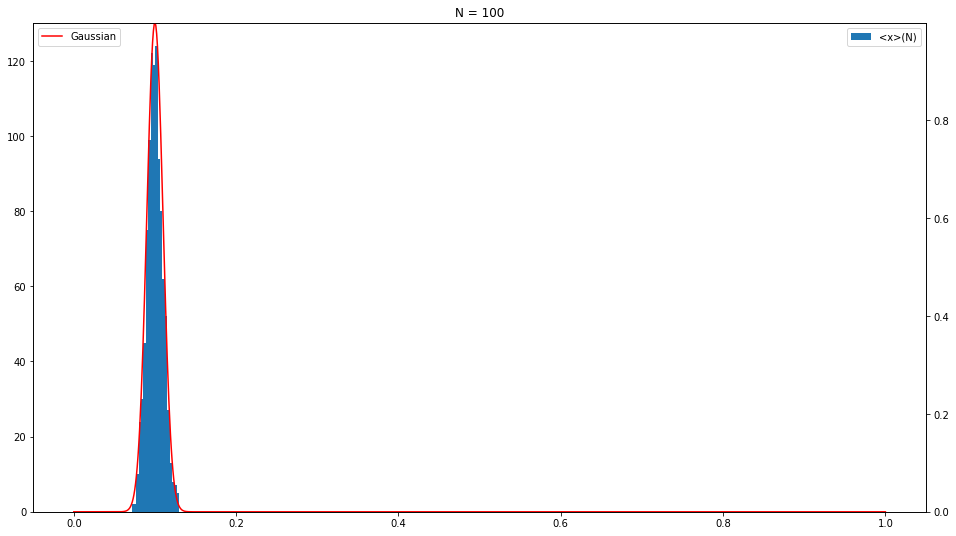

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from IPython.display import display

init_printing(use_unicode=True)

class problem_9:

    def __init__(self, L):

        # Length of the Tube
        self.L = L
        self.generator = np.random.default_rng()
        
    def _draw_uniform(self, size):
        # Draws size=(M, N) samples from uniform distribution and output as array
        # N is the number of samples.
        # M is the M times that we take N samples

        return self.generator.uniform(low=0.0, high=self.L, size=size)

    def _draw_exponential(self, size):
        # Draws size=(M, N) samples from exponential distribution and output as array
        # N is the number of samples.
        # M is the M times that we take N samples

        # scale for the exponential distribution
        beta = self.L / 10.0
        return self.generator.exponential(scale = beta, size=size)
        
    def _compute_exponential_mean(self):
        # Compute the mean of exponential distribution

        x, L = symbols("x L")
        exp_dist = 10/L*exp(-10*x/L)
        mean = integrate(exp_dist*x, (x, 0, L))

        return mean
        
    def _compute_exponential_sigma(self):
        # Compute the variance of exponetial distribution

        x, L, N = symbols("x L N")
        exp_dist = 10/L*exp(-10*x/L)
        
        mean = self._compute_exponential_mean()

        variance = integrate(exp_dist*(x - mean)**2, (x, 0, L)) / N
        sigma = sqrt(variance)
        
        return sigma

    def _compute_mean_from_sample(self, size, dist_type):
        # Compute mean value from the distribution for a given size=(M, N)
        # Output gives an array of size M, 

        if dist_type == "uniform":
            samples = self._draw_uniform(size)

        elif dist_type == "exponential":
            samples = self._draw_exponential(size)
            
        else:
            ValueError("Invalid Distribution Type")

        return np.sum(samples, axis=1) / size[1]

    def _compute_gaussian(self, x, mean, sigma):
        # compute Normalized Gaussian distribution given mean and sigma

        # return 1.0/sigma/np.sqrt(2.0 * np.pi) * np.exp(-0.5*((x - mean)/sigma)**2)
        return np.exp(-0.5*((x - mean)/sigma)**2)

    def _plot(self, Ns, dist_type, plot_gaussian=False):
        # Plot Probability Distribution and Gaussian distribution:

        if dist_type == "uniform":

            mean = 0.5 * self.L
            sigma = np.sqrt((self.L * self.L / 12) / Ns)
            size = (1000, Ns)
            xbars = self._compute_mean_from_sample(size, "uniform")

        elif dist_type == "exponential":

            L, N = symbols("L N")

            mean_func = lambdify([L], self._compute_exponential_mean())
            mean = mean_func(self.L)
            
            sigma_func = lambdify([L, N], self._compute_exponential_sigma())
            sigma = sigma_func(self.L, Ns)

            size = (1000, Ns)
            xbars = self._compute_mean_from_sample(size, "exponential")

        else:
            ValueError("Invalid Distribution Type")

        bins = 20

        fig, ax1 = plt.subplots(figsize=(16,9))
        ax1.hist(xbars, bins=bins, label=r"<x>(N)")
        ax1.legend(loc="upper right")

        if plot_gaussian:
            x = np.linspace(0.0, self.L, 1000)
            y = self._compute_gaussian(x, mean, sigma)

            ax2 = ax1.twinx()
            ax2.plot(x, y, color="red", label="Gaussian")
            ax2.legend(loc="upper left")
            ax2.set_ylim([0.0, np.amax(y)])

        plt.title(f"N = {size[1]}")
        plt.show()

        return fig

    def part_a(self):
        # Do Part A of the problem.
        # Plot Distribution of <X>(N) using uniform distribution.
        
        # N = 1
        N_1 = self._plot(1, "uniform")
        
        # N = 3
        N_3 = self._plot(3, "uniform")
        
        # N = 10
        N_10 = self._plot(10, "uniform")

        # N = 100
        N_100 = self._plot(100, "uniform", plot_gaussian=True)

    def part_b(self):
        # Do Part B of the problem.
        # Solve for mean and standard deviation of the exponential distribution
        
        mean = self._compute_exponential_mean()
        sigma = self._compute_exponential_sigma()
    
        print("Mean of the exponential distribution is: \n")
        display(simplify(mean))
        print("Standard Deviation of the exponential distribution is: \n")
        display(simplify(sigma))

    def part_c(self):
        # Do Part C of the problem.
        # Plot Distribution of <X>(N) using exponential distribution.
        
        # N = 1
        N_1 = self._plot(1, "exponential")
        
        # N = 3
        N_3 = self._plot(3, "exponential")
        
        # N = 10
        N_10 = self._plot(10, "exponential")

        # N = 100
        N_100 = self._plot(100, "exponential", plot_gaussian=True)

# Solve problem 9

prob9 = problem_9(L=1.0)
prob9.part_a()
prob9.part_b()
prob9.part_c()        
        